In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dir = '/content/drive/MyDrive/Maestria/SemestreII/CDA Final/'

In [4]:
datos = pd.read_csv(dir+"procesado_df.csv")

In [5]:
datos.head(1)

,Unnamed: 0,df_index,review_score,price,freight_value,payment_type,payment_installments,payment_value,seller_city,seller_state,customer_city,customer_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,cant_prods_orden,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,tiempo_aprobacion_horas,tiempo_alistamiento_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
0,0,0,4,185.0,13.63,credit_card,8,397.26,sao joaquim da barra,SP,osasco,SP,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,2,4.289855,4.5,4.10747,346,6.82,4.0,0.0,0.0,0,0,1


## **Eliminar columnas categóricas**

In [6]:
datos.drop(columns=[
        'Unnamed: 0', 'df_index','payment_type', 'payment_installments', 'payment_value', "product_category_name", "customer_state","customer_city","seller_state","seller_city"
        ], inplace = True)

In [7]:
datos.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,cant_prods_orden,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,tiempo_aprobacion_horas,tiempo_alistamiento_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
0,4,185.0,13.63,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,2,4.289855,4.50,4.10747,346,6.82,4.0,0.0,0.0,0,0,1
1,4,185.0,13.63,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,2,4.289855,4.50,4.10747,346,6.82,4.0,0.0,0.0,0,0,1
2,5,185.0,20.26,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,1,4.289855,4.50,4.10747,1100,20.26,13.0,0.0,0.0,0,0,1
3,5,185.0,17.05,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,1,4.289855,4.50,4.10747,519,17.05,19.0,0.0,0.0,0,0,1
4,5,135.0,18.20,47.0,858.0,1.0,1600.0,30.0,30.0,35.0,2,4.289855,4.25,4.10747,188,9.10,16.0,0.0,0.0,0,0,1


## **Correlacion**

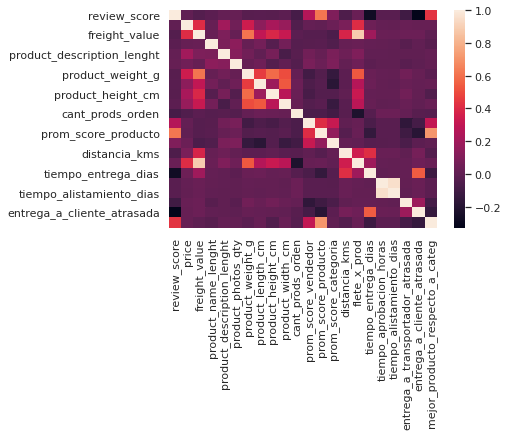

In [8]:
sns.heatmap(datos.corr())

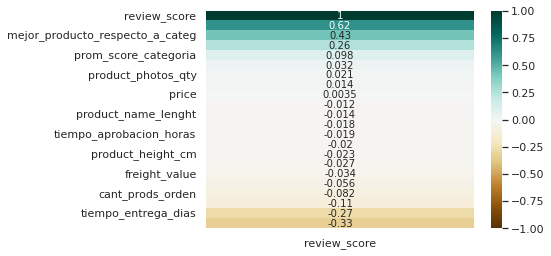

In [9]:
heatmap = sns.heatmap(datos.corr()[['review_score']].sort_values(by='review_score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [10]:
estimators_normalized = [
              ('encoder', OrdinalEncoder()),
              ('normalize', MinMaxScaler()),
             ]             
pipe_normalized = Pipeline(estimators_normalized)
pipe_normalized

Pipeline(memory=None,
         steps=[('encoder',
                 OrdinalEncoder(categories='auto',
                                dtype=<class 'numpy.float64'>)),
                ('normalize', MinMaxScaler(copy=True, feature_range=(0, 1)))],
         verbose=False)

In [11]:
data_norm = pd.DataFrame(pipe_normalized.fit_transform(datos), columns=datos.columns)
data_norm.head()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,cant_prods_orden,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,tiempo_aprobacion_horas,tiempo_alistamiento_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
0,0.75,0.628626,0.162323,0.578125,0.283917,0.0,0.388453,0.234694,0.277228,0.311828,0.043478,0.721687,0.862170,0.56338,0.116852,0.098680,0.083916,0.0,0.0,0.0,0.0,1.0
1,0.75,0.628626,0.162323,0.578125,0.283917,0.0,0.388453,0.234694,0.277228,0.311828,0.043478,0.721687,0.862170,0.56338,0.116852,0.098680,0.083916,0.0,0.0,0.0,0.0,1.0
2,1.00,0.628626,0.258844,0.578125,0.283917,0.0,0.388453,0.234694,0.277228,0.311828,0.000000,0.721687,0.862170,0.56338,0.371496,0.295455,0.146853,0.0,0.0,0.0,0.0,1.0
3,1.00,0.628626,0.212112,0.578125,0.283917,0.0,0.388453,0.234694,0.277228,0.311828,0.000000,0.721687,0.862170,0.56338,0.175279,0.248387,0.188811,0.0,0.0,0.0,0.0,1.0
4,1.00,0.519715,0.228854,0.656250,0.283917,0.0,0.427252,0.234694,0.277228,0.311828,0.043478,0.721687,0.696481,0.56338,0.063492,0.131965,0.167832,0.0,0.0,0.0,0.0,1.0


In [12]:
data_norm.corr()

,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,cant_prods_orden,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,tiempo_aprobacion_horas,tiempo_alistamiento_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
review_score,1.000000,0.009580,-0.040290,-0.014043,0.015265,0.021380,-0.020494,-0.019971,-0.023176,-0.011935,-0.113470,0.245754,0.566763,0.092373,-0.056245,0.044314,-0.275003,-0.017299,-0.017072,-0.105213,-0.328857,0.434710
price,0.009580,1.000000,0.446395,0.044952,0.220987,0.045824,0.494527,0.240142,0.308012,0.264999,-0.083752,0.073624,0.027414,0.034504,0.114879,0.439812,0.077972,-0.001365,-0.004099,0.027537,0.026056,0.030938
freight_value,-0.040290,0.446395,1.000000,0.027986,0.118587,0.019652,0.533720,0.320403,0.399155,0.336070,-0.022842,-0.016443,-0.021447,-0.030451,0.478312,0.854183,0.253678,0.033837,0.026114,0.035360,0.045014,-0.004568
product_name_lenght,-0.014043,0.044952,0.027986,1.000000,0.091154,0.143268,0.070278,0.062505,-0.029271,0.064769,-0.028256,-0.064215,-0.032302,-0.065774,0.021548,0.036195,0.015683,0.008692,0.005142,-0.023486,0.006297,-0.022793
product_description_lenght,0.015265,0.220987,0.118587,0.091154,1.000000,0.120324,0.079851,0.008360,0.080521,-0.073911,-0.025269,0.080964,0.027032,0.110811,0.045394,0.120945,0.004754,0.008902,0.003295,-0.000915,0.001536,0.015403
product_photos_qty,0.021380,0.045824,0.019652,0.143268,0.120324,1.000000,0.024453,0.045654,-0.033444,0.004985,-0.054501,0.075556,0.035551,0.084992,0.014740,0.052118,-0.010302,0.002681,0.001803,-0.020866,-0.002076,0.010822
product_weight_g,-0.020494,0.494527,0.533720,0.070278,0.079851,0.024453,1.000000,0.564961,0.587840,0.609489,0.031126,-0.067917,-0.028739,-0.084216,0.003060,0.442257,0.047936,0.015937,0.013303,0.048840,0.018793,0.002209
product_length_cm,-0.019971,0.240142,0.320403,0.062505,0.008360,0.045654,0.564961,1.000000,0.190493,0.535980,0.034579,-0.058470,-0.025832,-0.139242,-0.008150,0.259924,0.036311,0.008924,0.007563,0.026354,0.014650,0.023371
product_height_cm,-0.023176,0.308012,0.399155,-0.029271,0.080521,-0.033444,0.587840,0.190493,1.000000,0.279098,0.040338,-0.059478,-0.035087,0.064749,0.000352,0.317740,0.017985,0.013167,0.010810,0.055702,0.010891,-0.044622
product_width_cm,-0.011935,0.264999,0.336070,0.064769,-0.073911,0.004985,0.609489,0.535980,0.279098,1.000000,0.023630,-0.049942,-0.015994,-0.117131,-0.019755,0.280760,0.020118,0.000128,0.003312,0.025431,0.004566,0.027270


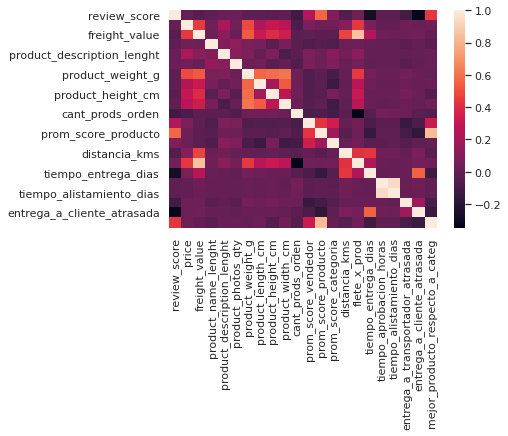

In [13]:
sns.heatmap(data_norm.corr())

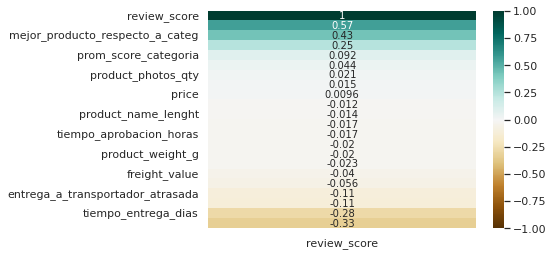

In [14]:
heatmap = sns.heatmap(data_norm.corr()[['review_score']].sort_values(by='review_score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import time
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [16]:

x_train, x_test, y_train, y_test = train_test_split( datos.drop('review_score', axis=1), datos['review_score'], test_size = 0.3, random_state=42)

In [17]:
# rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')

In [18]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [19]:
pred=rfc1.predict(x_test)


In [20]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.6422061782459463


In [21]:
def validarMetricas(model):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    print('Train set:')
    print('Accuracy:', accuracy_score(y_train, y_train_pred))
    print('Recall:', recall_score(y_train, y_train_pred, average = None))
    print('Precision:', precision_score(y_train, y_train_pred, average = None))
    print('F1:', f1_score(y_train, y_train_pred, average = None))
    
    print('\n\nTest set:')
    print('Accuracy:', accuracy_score(y_test, y_test_pred))
    print('Recall:', recall_score(y_test, y_test_pred, average = None))
    print('Precision:', precision_score(y_test, y_test_pred, average = None))
    print('F1:', f1_score(y_test, y_test_pred, average = None))

In [22]:
validarMetricas(rfc1)

Train set:
Accuracy: 0.6391189114473034
Recall: [0.59813292 0.00222387 0.01184053 0.02466148 0.98568647]
Precision: [0.61319357 1.         1.         0.93781095 0.64022244]
F1: [0.60556962 0.00443787 0.02340394 0.04805915 0.77625332]


Test set:
Accuracy: 0.6422061782459463
Recall: [5.96850394e-01 8.85739593e-04 5.33617930e-03 1.41678343e-02
 9.84711818e-01]
Precision: [0.60366339 1.         1.         0.92857143 0.64593014]
F1: [0.60023756 0.00176991 0.01061571 0.02790983 0.78012839]


In [23]:
importances = rfc1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc1.estimators_], axis=0)
feature_names = [f"Variable {i}" for i in range(datos.drop('review_score', axis=1).shape[1])]

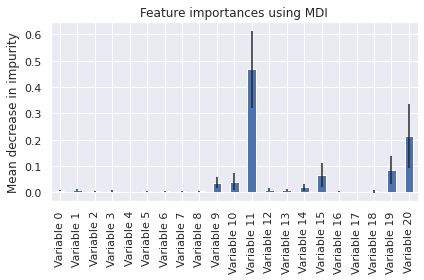

In [24]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [25]:
sample_data = pd.DataFrame({       
        'Variable': datos.drop('review_score', axis=1).columns, 
        "Importancia": std,
        "Corr":datos.corr()['review_score'][1:],
        'NumVariable' : range(0, len(datos.drop('review_score', axis=1).columns) )}
     )
sample_data.sort_values(by="Importancia")
# sample_data

,Variable,Importancia,Corr,NumVariable
tiempo_alistamiento_dias,tiempo_alistamiento_dias,0.000614,-0.018460,17
product_photos_qty,product_photos_qty,0.001074,0.021336,4
tiempo_aprobacion_horas,tiempo_aprobacion_horas,0.001493,-0.019451,16
product_name_lenght,product_name_lenght,0.001743,-0.014056,2
product_width_cm,product_width_cm,0.001928,-0.011981,8
product_height_cm,product_height_cm,0.002127,-0.023177,7
product_length_cm,product_length_cm,0.002308,-0.019971,6
product_description_lenght,product_description_lenght,0.002354,0.014287,3
product_weight_g,product_weight_g,0.002360,-0.027091,5
price,price,0.003056,0.003494,0


In [26]:
datos1=datos.copy()

In [27]:
datos1.drop(columns=[
        'product_photos_qty',"product_length_cm","product_width_cm","product_name_lenght","price","product_weight_g","product_height_cm",
        "tiempo_alistamiento_dias","tiempo_aprobacion_horas",
        "freight_value","product_description_lenght", "cant_prods_orden"
        ], inplace = True)

In [28]:
datos1

,review_score,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
0,4,4.289855,4.500000,4.107470,346,6.82,4.0,0,0,1
1,4,4.289855,4.500000,4.107470,346,6.82,4.0,0,0,1
2,5,4.289855,4.500000,4.107470,1100,20.26,13.0,0,0,1
3,5,4.289855,4.500000,4.107470,519,17.05,19.0,0,0,1
4,5,4.289855,4.250000,4.107470,188,9.10,16.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
112648,5,4.422222,4.333333,3.266667,2463,49.30,19.0,0,0,1
112649,5,4.422222,4.333333,3.266667,866,39.11,6.0,0,0,1
112650,5,4.400000,5.000000,3.266667,612,19.78,9.0,0,0,1
112651,4,4.400000,4.000000,3.266667,299,14.30,4.0,0,0,1


In [29]:

x_train, x_test, y_train, y_test = train_test_split( datos1.drop('review_score', axis=1), datos1['review_score'], test_size = 0.3, random_state=42)

In [30]:
rfc2=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')

In [31]:
rfc2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [32]:
pred1=rfc2.predict(x_test)


In [33]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred1))

Accuracy for Random Forest on CV data:  0.6586578293289147


In [34]:
importances = rfc2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc2.estimators_], axis=0)
feature_names = [f"Variable {i}" for i in range(datos1.drop('review_score', axis=1).shape[1])]

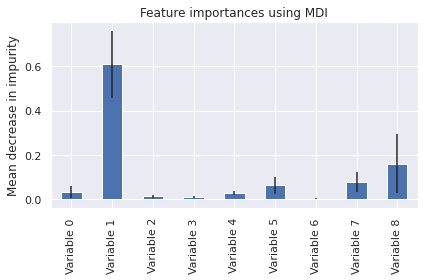

In [35]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [36]:
sample_data = pd.DataFrame({       
        'Variable': datos1.drop('review_score', axis=1).columns, 
        'NumVariable' : range(0, len(datos1.drop('review_score', axis=1).columns))}
     )
sample_data

,Variable,NumVariable
0,prom_score_vendedor,0
1,prom_score_producto,1
2,prom_score_categoria,2
3,distancia_kms,3
4,flete_x_prod,4
5,tiempo_entrega_dias,5
6,entrega_a_transportador_atrasada,6
7,entrega_a_cliente_atrasada,7
8,mejor_producto_respecto_a_categ,8


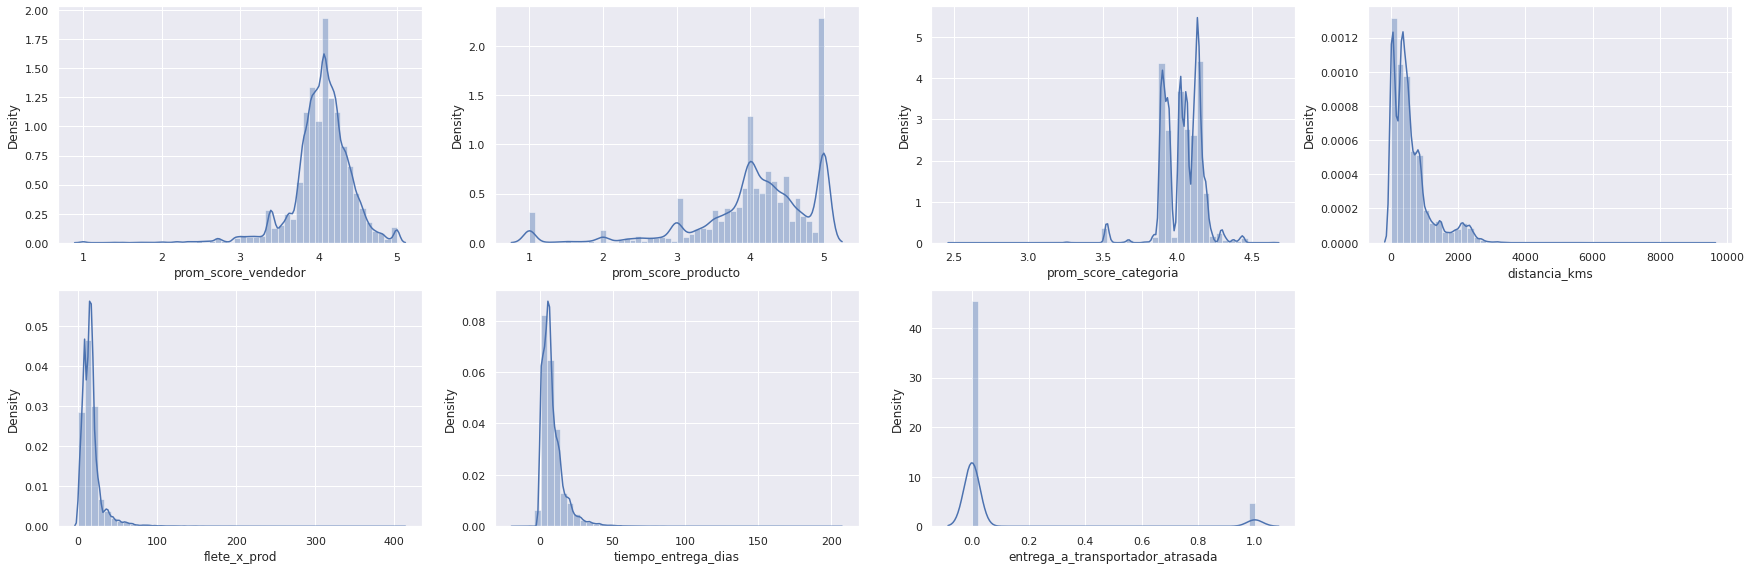

In [37]:
fig = plt.figure(figsize = (30,20))
for i, item in enumerate (datos1.drop(['mejor_producto_respecto_a_categ','entrega_a_cliente_atrasada','review_score'], axis=1)):
    plt.subplot(4,4,i+1)
    sns.distplot(datos1[item])

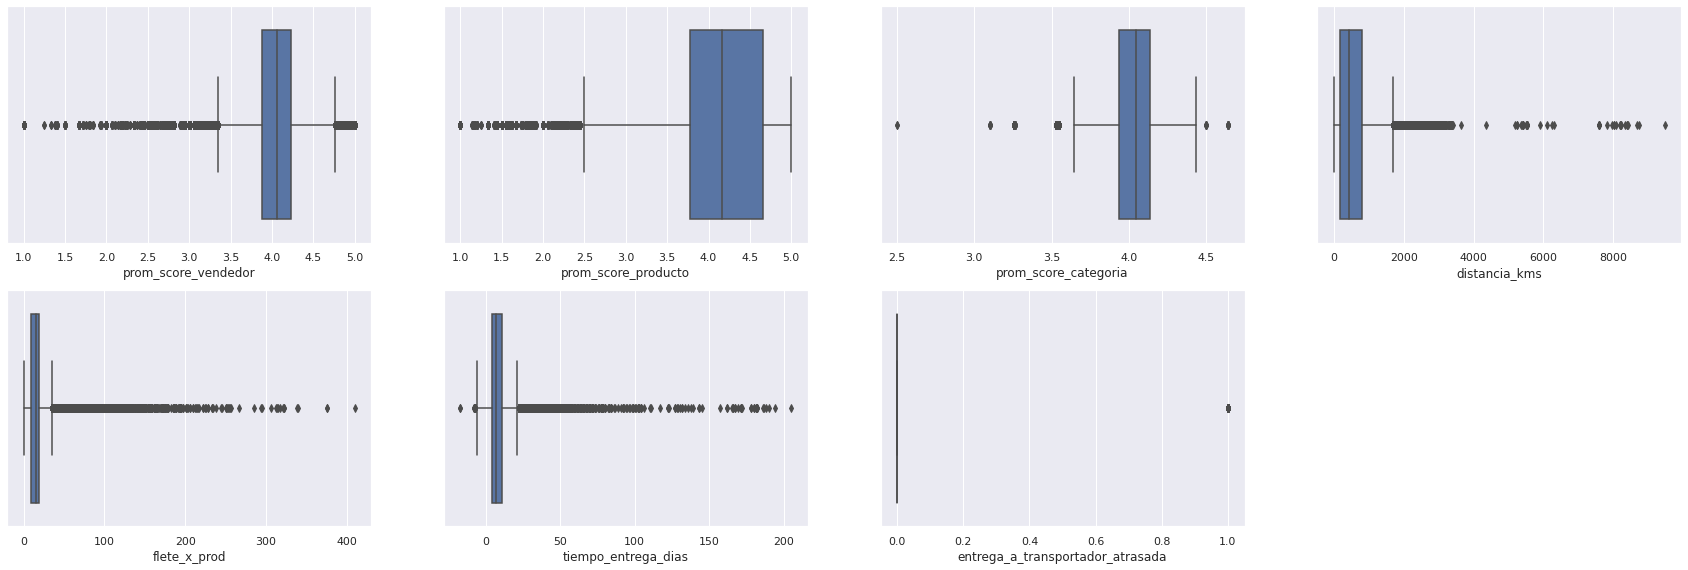

In [38]:
fig = plt.figure(figsize = (30,20))
for i, item in enumerate (datos1.drop(['mejor_producto_respecto_a_categ','entrega_a_cliente_atrasada','review_score'], axis=1)):
    plt.subplot(4,4,i+1)
    sns.boxplot(datos1[item])

In [39]:
datos1.describe()

,review_score,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
count,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000
mean,4.082235,4.044601,4.060784,4.034154,601.612625,16.827995,8.703319,0.092070,0.076882,0.596904
std,1.346108,0.372818,0.841205,0.129356,601.245586,15.152474,8.537993,0.289127,0.266405,0.490522
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,-17.000000,0.000000,0.000000,0.000000
25%,4.000000,3.882979,3.777778,3.936089,191.000000,8.530000,4.000000,0.000000,0.000000,0.000000
50%,5.000000,4.066929,4.166667,4.044271,435.000000,14.640000,7.000000,0.000000,0.000000,1.000000
75%,5.000000,4.237113,4.659574,4.137973,794.000000,18.940000,11.000000,0.000000,0.000000,1.000000
max,5.000000,5.000000,5.000000,4.642857,9473.000000,409.680000,205.000000,1.000000,1.000000,1.000000


In [40]:
item="prom_score_vendedor"
print(datos1.describe()[item].iloc[1])
print(datos1.describe()[item].iloc[2])
print(datos1.describe()[item].iloc[2]*3)
print((datos1.describe()[item].iloc[1] - (datos1.describe()[item].iloc[2]*3)))
# datos1[datos1[item] < (datos1.describe()[item].iloc[1] + (datos1.describe()[item].iloc[2]*3))]
datos1.describe()

4.0446011622570435
0.3728179778734134
1.1184539336202404
2.926147228636803


,review_score,prom_score_vendedor,prom_score_producto,prom_score_categoria,distancia_kms,flete_x_prod,tiempo_entrega_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
count,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000,112653.000000
mean,4.082235,4.044601,4.060784,4.034154,601.612625,16.827995,8.703319,0.092070,0.076882,0.596904
std,1.346108,0.372818,0.841205,0.129356,601.245586,15.152474,8.537993,0.289127,0.266405,0.490522
min,1.000000,1.000000,1.000000,2.500000,0.000000,0.000000,-17.000000,0.000000,0.000000,0.000000
25%,4.000000,3.882979,3.777778,3.936089,191.000000,8.530000,4.000000,0.000000,0.000000,0.000000
50%,5.000000,4.066929,4.166667,4.044271,435.000000,14.640000,7.000000,0.000000,0.000000,1.000000
75%,5.000000,4.237113,4.659574,4.137973,794.000000,18.940000,11.000000,0.000000,0.000000,1.000000
max,5.000000,5.000000,5.000000,4.642857,9473.000000,409.680000,205.000000,1.000000,1.000000,1.000000


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB


In [43]:
# # x_train, x_test, y_train, y_test = train_test_split( datos2.drop('review_score', axis=1), datos2['review_score'], test_size = 0.3, random_state=42)
# # X_train, X_test, y_train, y_test = train_test_split(X_ROS, y_ROS, random_state = 0)
# models = [
#     RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=0),
# ]
# CV = 5
# cv_df = pd.DataFrame(index=range(CV * len(models)))
# entries = []
# for model in models:
#   model_name = model.__class__.__name__
#   # features, labels
#   accuracies = cross_val_score(model, datos1.drop('review_score', axis=1), datos1['review_score'] , scoring='accuracy', cv=CV)
#   # accuracies = cross_val_score(model, features, labels , scoring='accuracy', cv=CV)
#   for fold_idx, accuracy in enumerate(accuracies):
#     entries.append((model_name, fold_idx, accuracy))
# cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
# import seaborn as sns
# sns.boxplot(x='model_name', y='accuracy', data=cv_df)
# sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
#               size=8, jitter=True, edgecolor="gray", linewidth=2)
# plt.ylabel('Sentimiento Precisión')
# plt.xlabel('Sentimiento Algoritmo')
# plt.show()

In [44]:
# cv_df.groupby('model_name').accuracy.mean()

In [45]:
datos2=datos.copy()

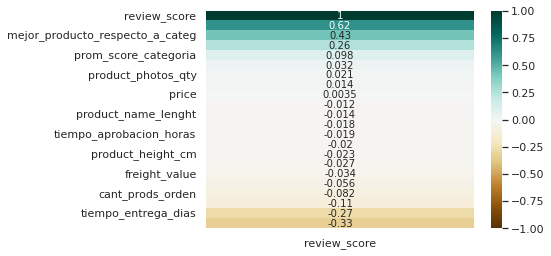

In [46]:
heatmap = sns.heatmap(datos2.corr()[['review_score']].sort_values(by='review_score', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [47]:
datos2.drop(columns=[
        'product_photos_qty',
        "product_length_cm","product_width_cm","product_name_lenght","price","product_weight_g","product_height_cm","tiempo_alistamiento_dias","tiempo_aprobacion_horas",
        "freight_value",
        "product_description_lenght",
        # "cant_prods_orden",
        "freight_value",
        "prom_score_categoria",
        "flete_x_prod",
        'distancia_kms',
        ], inplace = True)

In [48]:
datos2.columns

Index(['review_score', 'cant_prods_orden', 'prom_score_vendedor',
       'prom_score_producto', 'tiempo_entrega_dias',
       'entrega_a_transportador_atrasada', 'entrega_a_cliente_atrasada',
       'mejor_producto_respecto_a_categ'],
      dtype='object')

In [49]:
df1 = datos2
for item in df1.describe().drop(['mejor_producto_respecto_a_categ','entrega_a_cliente_atrasada','review_score','entrega_a_transportador_atrasada'], axis=1):
  print("\n"+item)
  print(df1.describe()[item].iloc[1] + (df1.describe()[item].iloc[2]*3))
  df1 = df1[df1[item] < (df1.describe()[item].iloc[1] + (df1.describe()[item].iloc[2]*3))]
  print(df1.shape)


cant_prods_orden
8.825711024022606
(111397, 8)

prom_score_vendedor
5.158945293462785
(111397, 8)

prom_score_producto
6.570085485883359
(111397, 8)

tiempo_entrega_dias
34.410917189656914
(109579, 8)


In [50]:
df1.columns

Index(['review_score', 'cant_prods_orden', 'prom_score_vendedor',
       'prom_score_producto', 'tiempo_entrega_dias',
       'entrega_a_transportador_atrasada', 'entrega_a_cliente_atrasada',
       'mejor_producto_respecto_a_categ'],
      dtype='object')

In [51]:
df2 = df1
from scipy import stats
z = np.abs(stats.zscore(df2.drop(['entrega_a_cliente_atrasada','review_score'],axis=1)))
df2 = df2[(z<3).all(axis=1)]

In [52]:
df2.shape

(92434, 8)

In [53]:
# datos2 = df1
datos2 = df2

In [54]:
datos2.shape

(92434, 8)

In [55]:
datos2.describe()

,review_score,cant_prods_orden,prom_score_vendedor,prom_score_producto,tiempo_entrega_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
count,92434.000000,92434.000000,92434.000000,92434.000000,92434.000000,92434.0,92434.000000,92434.000000
mean,4.285804,1.330365,4.089940,4.190977,7.660147,0.0,0.033754,0.638607
std,1.150324,0.678994,0.307062,0.642284,5.622851,0.0,0.180596,0.480407
min,1.000000,1.000000,2.933333,1.600000,-5.000000,0.0,0.000000,0.000000
25%,4.000000,1.000000,3.909522,3.900000,4.000000,0.0,0.000000,0.000000
50%,5.000000,1.000000,4.076923,4.210526,6.000000,0.0,0.000000,1.000000
75%,5.000000,1.000000,4.265625,4.666667,11.000000,0.0,0.000000,1.000000
max,5.000000,4.000000,5.000000,5.000000,27.000000,0.0,1.000000,1.000000


In [56]:

x_train, x_test, y_train, y_test = train_test_split( datos2.drop('review_score', axis=1), datos2['review_score'], test_size = 0.3, random_state=42)

In [57]:
rfc3=RandomForestClassifier(random_state=42, n_estimators= 100)

In [58]:
rfc3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [59]:
pred2=rfc3.predict(x_test)


In [60]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred2))

Accuracy for Random Forest on CV data:  0.6528794489921027


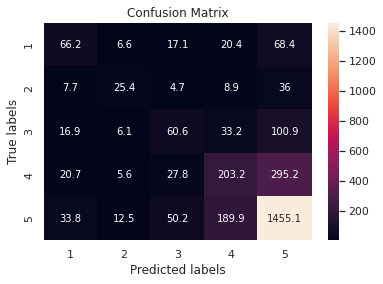

In [61]:
labels=[1,2,3,4,5]
cf_matrix = confusion_matrix(y_test, pred2, labels)/10

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);

In [62]:
validarMetricas(rfc3)

Train set:
Accuracy: 0.9089686722408543
Recall: [0.82574493 0.81875659 0.78660095 0.81090381 0.97071454]
Precision: [0.93470049 0.9384058  0.92250054 0.89230122 0.90875307]
F1: [0.87685103 0.8745076  0.8491477  0.84965749 0.93871244]


Test set:
Accuracy: 0.6528794489921027
Recall: [0.37045327 0.30713422 0.27836472 0.36778281 0.83554407]
Precision: [0.45560908 0.4519573  0.37780549 0.44600527 0.74406832]
F1: [0.40864198 0.36573074 0.32055012 0.40313461 0.7871575 ]


In [63]:
importances = rfc3.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc3.estimators_], axis=0)
feature_names = [f"Variable {i}" for i in range(datos2.drop('review_score', axis=1).shape[1])]

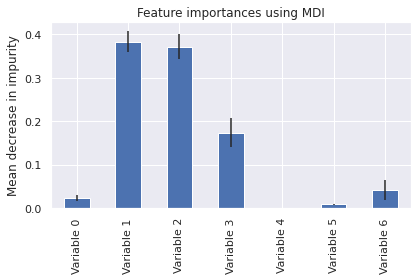

In [64]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [65]:
sample_data = pd.DataFrame({       
        'Variable': datos2.drop('review_score', axis=1).columns, 
        'NumVariable' : range(0, len(datos2.drop('review_score', axis=1).columns))}
     )
sample_data

,Variable,NumVariable
0,cant_prods_orden,0
1,prom_score_vendedor,1
2,prom_score_producto,2
3,tiempo_entrega_dias,3
4,entrega_a_transportador_atrasada,4
5,entrega_a_cliente_atrasada,5
6,mejor_producto_respecto_a_categ,6


In [66]:
datos2.corr()

,review_score,cant_prods_orden,prom_score_vendedor,prom_score_producto,tiempo_entrega_dias,entrega_a_transportador_atrasada,entrega_a_cliente_atrasada,mejor_producto_respecto_a_categ
review_score,1.000000,-0.148341,0.182852,0.491945,-0.152497,NaN,-0.170693,0.362863
cant_prods_orden,-0.148341,1.000000,-0.078490,-0.088666,-0.036118,NaN,-0.023445,-0.064115
prom_score_vendedor,0.182852,-0.078490,1.000000,0.366989,-0.066886,NaN,-0.029391,0.273709
prom_score_producto,0.491945,-0.088666,0.366989,1.000000,-0.096677,NaN,-0.072740,0.749489
tiempo_entrega_dias,-0.152497,-0.036118,-0.066886,-0.096677,1.000000,NaN,0.345520,-0.067396
entrega_a_transportador_atrasada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entrega_a_cliente_atrasada,-0.170693,-0.023445,-0.029391,-0.072740,0.345520,NaN,1.000000,-0.056295
mejor_producto_respecto_a_categ,0.362863,-0.064115,0.273709,0.749489,-0.067396,NaN,-0.056295,1.000000


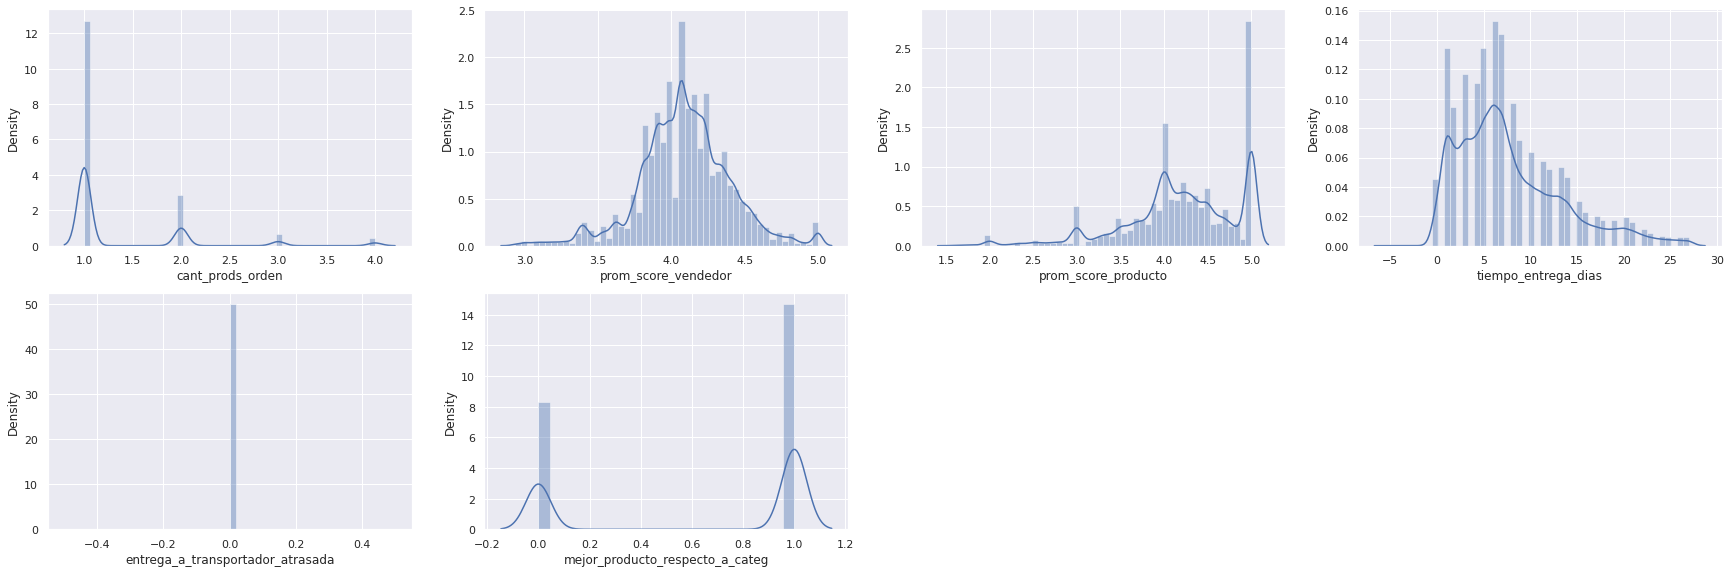

In [67]:
fig = plt.figure(figsize = (30,20))
for i, item in enumerate (datos2.drop(['entrega_a_cliente_atrasada','review_score'], axis=1)):
    plt.subplot(4,4,i+1)
    sns.distplot(datos2[item])

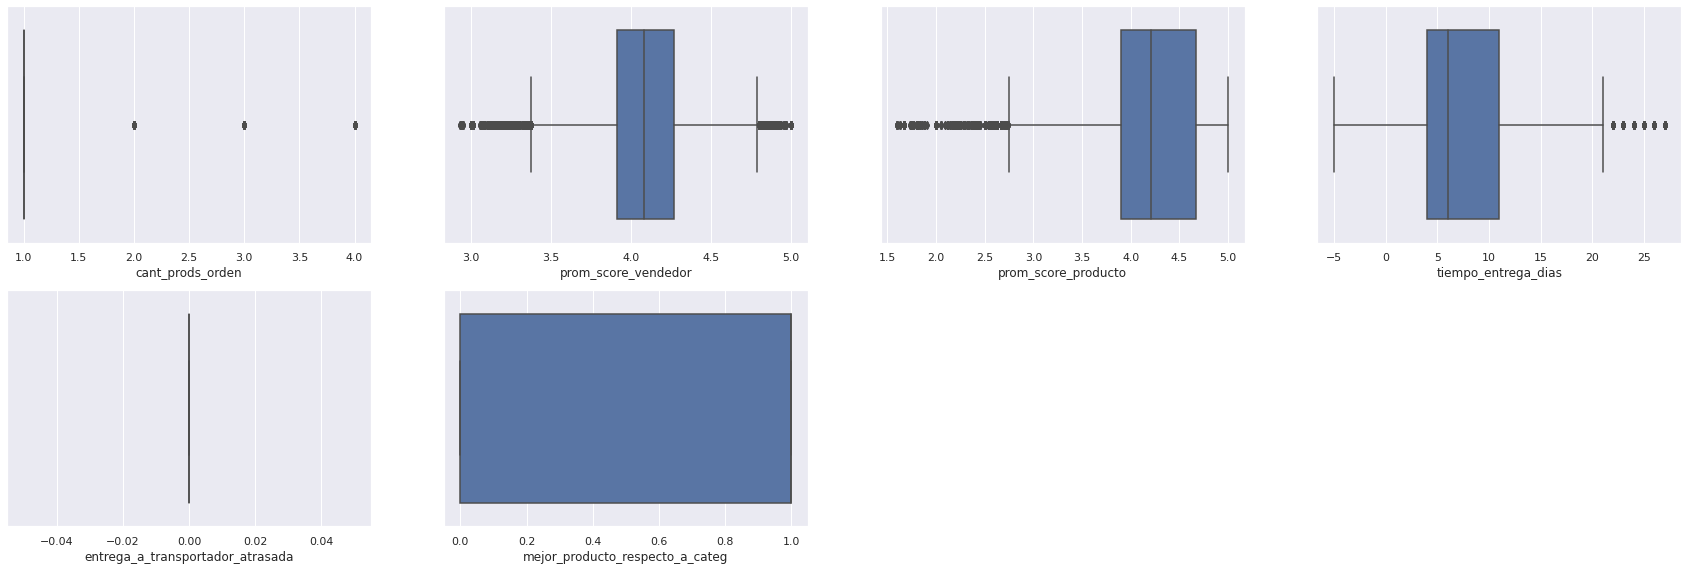

In [68]:
fig = plt.figure(figsize = (30,20))
for i, item in enumerate (datos2.drop(['entrega_a_cliente_atrasada','review_score'], axis=1)):
    plt.subplot(4,4,i+1)
    sns.boxplot(datos2[item])

In [69]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=777)
X_ROS, y_ROS = ros.fit_sample(datos2.drop('review_score', axis=1),  datos2['review_score'])

In [76]:

x_train, x_test, y_train, y_test = train_test_split( X_ROS, y_ROS, test_size = 0.3, random_state=42)

In [79]:
# rfc3=RandomForestClassifier(random_state=42, n_estimators= 100)

rfc4=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt'],
    'criterion' :['gini']
}

CV_rfc = GridSearchCV(estimator=rfc4, param_grid=param_grid, cv= 4)

In [80]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [81]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 200}

In [82]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [72]:
# rfc3.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [83]:
pred2=CV_rfc.best_estimator_.predict(x_test)


In [84]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred2))

Accuracy for Random Forest on CV data:  0.8666187183889379
